In [1]:
import pickle as pkl
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set(context="poster", style='whitegrid', font='sans-serif')

X_real = pkl.load(open('/data/SPRINT/MIMIC/X_processed_5.pkl', 'rb'))
y_real = pkl.load(open('/data/SPRINT/MIMIC/y_processed_5.pkl', 'rb'))

print(X_real.shape, y_real.shape)
print(sum(y_real))

public_dir = '/data/SPRINT/MIMIC/nonprivate'
private_dir = '/data/SPRINT/MIMIC/private'

((8260, 9, 5), (8260,))
2110


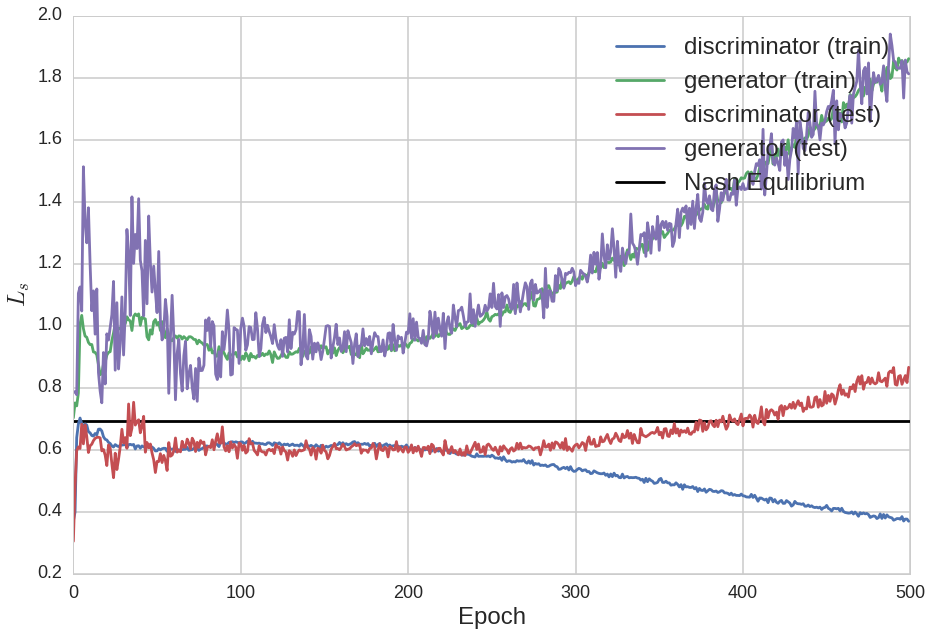

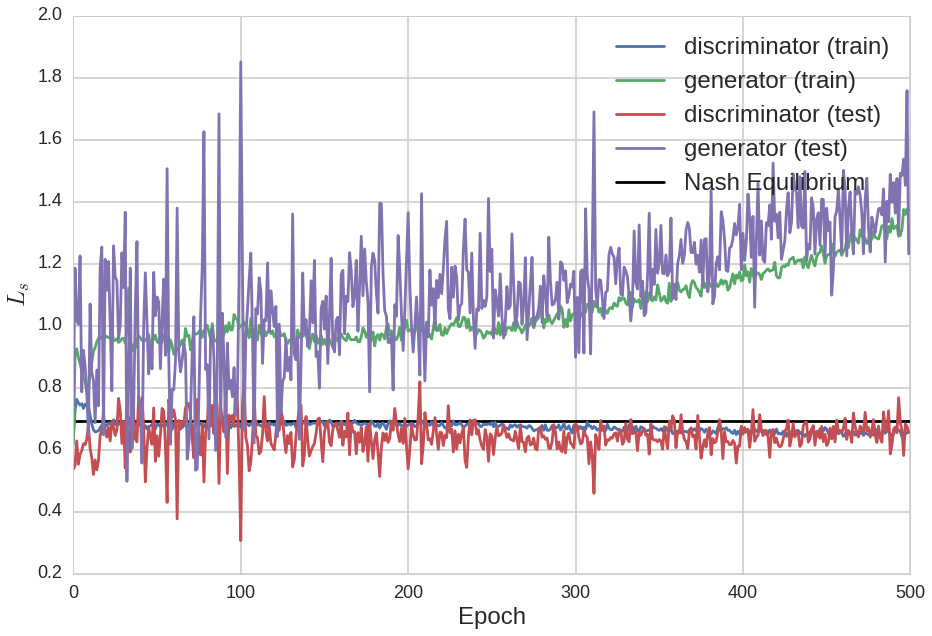

In [2]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
fig = plt.figure(figsize=(15,10))

hist = pkl.load(open(public_dir + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['generation_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.hlines(-np.log(0.5), 0, hist[p][g]['generation_loss'].shape[0], label='Nash Equilibrium')
plt.legend(fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel(r'$L_s$',  fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
fig.savefig('./figures/Figure_1D.png', bbox_inches='tight')


fig = plt.figure(figsize=(15,10))
hist = pkl.load(open(private_dir + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['generation_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.hlines(-np.log(0.5), 0, hist[p][g]['generation_loss'].shape[0], label='Nash Equilibrium')
plt.legend(fontsize=24)
plt.xlabel('Epoch', fontsize=24)
plt.ylabel(r'$L_s$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
fig.savefig('./figures/Figure_1E.png', bbox_inches='tight')

In [3]:
public_scores = pkl.load(open(public_dir + '/train_epoch_scores.p', 'rb'))
print(public_scores)
top_10_public = np.argsort(public_scores['rf'])[-5:]
top_10_lr = np.argsort(public_scores['lr'])[-5:]
top_10_public = np.concatenate([top_10_public, top_10_lr])
print(top_10_public)

{'rf': [0.74613333333333332, 0.74613333333333332, 0.74613333333333332, 0.73999999999999999, 0.73253333333333337, 0.74786666666666668, 0.72360000000000002, 0.70346666666666668, 0.73173333333333335, 0.74119999999999997, 0.68533333333333335, 0.72213333333333329, 0.70453333333333334, 0.7301333333333333, 0.73119999999999996, 0.74573333333333336, 0.74573333333333336, 0.74626666666666663, 0.74519999999999997, 0.74573333333333336, 0.74093333333333333, 0.74319999999999997, 0.72666666666666668, 0.74333333333333329, 0.73226666666666662, 0.61573333333333335, 0.74493333333333334, 0.73853333333333337, 0.67546666666666666, 0.68053333333333332, 0.63946666666666663, 0.62906666666666666, 0.68400000000000005, 0.56066666666666665, 0.68240000000000001, 0.64280000000000004, 0.48959999999999998, 0.64906666666666668, 0.52666666666666662, 0.62906666666666666, 0.67333333333333334, 0.68413333333333337, 0.67320000000000002, 0.61680000000000001, 0.62013333333333331, 0.60253333333333337, 0.61586666666666667, 0.5927

In [4]:
np.random.seed(1)
# noisy selection
epoch_scores = pkl.load(open(private_dir + '/train_epoch_scores.p', 'rb'))

eps_per = 0.05
size = 500

top_5_rf = []
top_5_lr = []

for i in range(5):
    print(eps_per*size)
    noisy_epoch_scores_rf = (epoch_scores['rf'] + 
                             (np.random.laplace(loc=0.0,
                                                scale=(1/(eps_per*size)),
                                                size=500)))
    
    j=1
    while(np.argsort(noisy_epoch_scores_rf)[-j:][0] in top_5_rf):
        j += 1
    top_5_rf.append(np.argsort(noisy_epoch_scores_rf)[-j:][0])
    size = size - 1
    
    noisy_epoch_scores_lr = (epoch_scores['lr'] + 
                             (np.random.laplace(loc=0.0,
                                                scale=(1/(eps_per*size)),
                                                size=500)))
    k=1
    while(np.argsort(noisy_epoch_scores_lr)[-k:][0] in top_5_lr):
        k += 1
    top_5_lr.append(np.argsort(noisy_epoch_scores_lr)[-k:][0])
    size = size - 1


rf_noisy_scores = [epoch_scores['rf'][x] for x in top_5_rf]
lr_noisy_scores = [epoch_scores['lr'][x] for x in top_5_lr]
top_10 = np.concatenate([top_5_rf, top_5_lr])
print('top 10 ', top_10)
print(rf_noisy_scores, lr_noisy_scores)


rf_clean_scores = [epoch_scores['rf'][x] for x in np.argsort(epoch_scores['rf'])[-5:]]
lr_clean_scores = [epoch_scores['lr'][x] for x in np.argsort(epoch_scores['lr'])[-5:]]
print(rf_clean_scores, lr_clean_scores)

25.0
24.9
24.8
24.7
24.6
('top 10 ', array([109, 122, 204,  36, 172, 281, 397, 145, 137,  26]))
([0.66879999999999995, 0.73693333333333333, 0.68933333333333335, 0.6982666666666667, 0.70933333333333337], [0.67120000000000002, 0.71960000000000002, 0.61080000000000001, 0.6996, 0.64453333333333329])
([0.746, 0.74639999999999995, 0.74653333333333338, 0.7466666666666667, 0.74719999999999998], [0.71760000000000002, 0.71960000000000002, 0.73560000000000003, 0.73733333333333329, 0.73893333333333333])


## Supplemental Figure 2

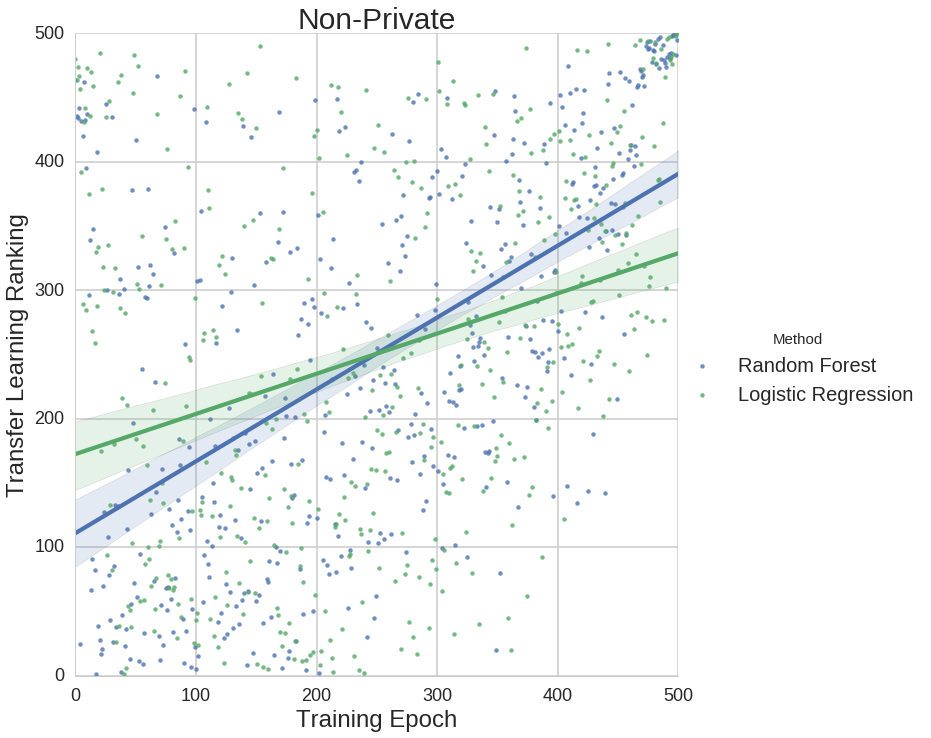

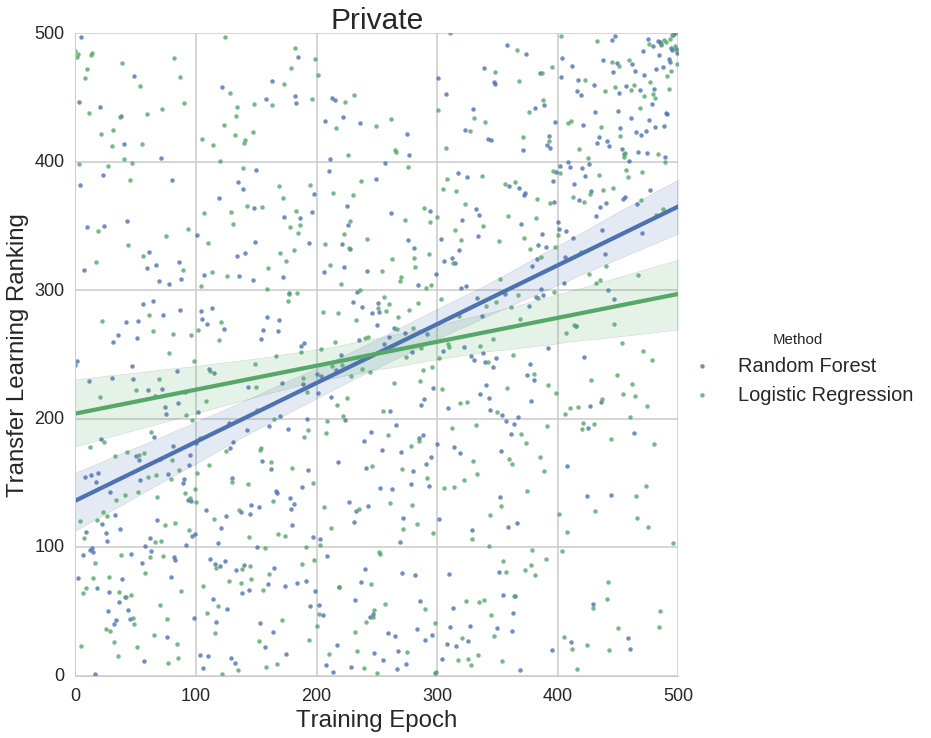

In [5]:
# plot public

params = {'legend.fontsize': 20}

plt.rcParams.update(params)
public = np.concatenate([500-np.argsort(public_scores['rf']), 500-np.argsort(public_scores['lr'])])
index = np.concatenate([range(500), range(500)])
method = np.concatenate([['Random Forest'] * 500, ['Logistic Regression'] * 500])

arg_scores = {'rank':public, 'index':index, 'Method':method}
arg_scores_df = pd.DataFrame.from_dict(arg_scores)

fig = plt.figure(figsize=(6,4))
g = sns.lmplot(x="index", y="rank", hue="Method", data=arg_scores_df, size=10,
               y_jitter=.02, logistic=False, legend=True)
g.set(xlim=(0, 500), ylim=(0, 500))

plt.title('Non-Private', fontsize=30)
plt.xlabel('Training Epoch', fontsize=24)
plt.ylabel('Transfer Learning Ranking', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
g.savefig('./figures/Supplemental_Figure_2A.png', bbox_inches='tight')

# plot private
private = np.concatenate([500-np.argsort(epoch_scores['rf']), 500-np.argsort(epoch_scores['lr'])])
index = np.concatenate([range(500), range(500)])
method = np.concatenate([['Random Forest'] * 500, ['Logistic Regression'] * 500])

arg_scores = {'rank':private, 'index':index, 'Method':method}
arg_scores_df = pd.DataFrame.from_dict(arg_scores)

fig = plt.figure(figsize=(6,4))
g = sns.lmplot(x="index", y="rank", hue="Method", data=arg_scores_df, size=10,
               y_jitter=.02, logistic=False, legend=True)
g.set(xlim=(0, 500), ylim=(0, 500))

plt.title('Private', fontsize=30)
plt.xlabel('Training Epoch', fontsize=24)
plt.ylabel('Transfer Learning Ranking', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
g.savefig('./figures/Supplemental_Figure_2B.png', bbox_inches='tight')

## Supplemental Figure 3

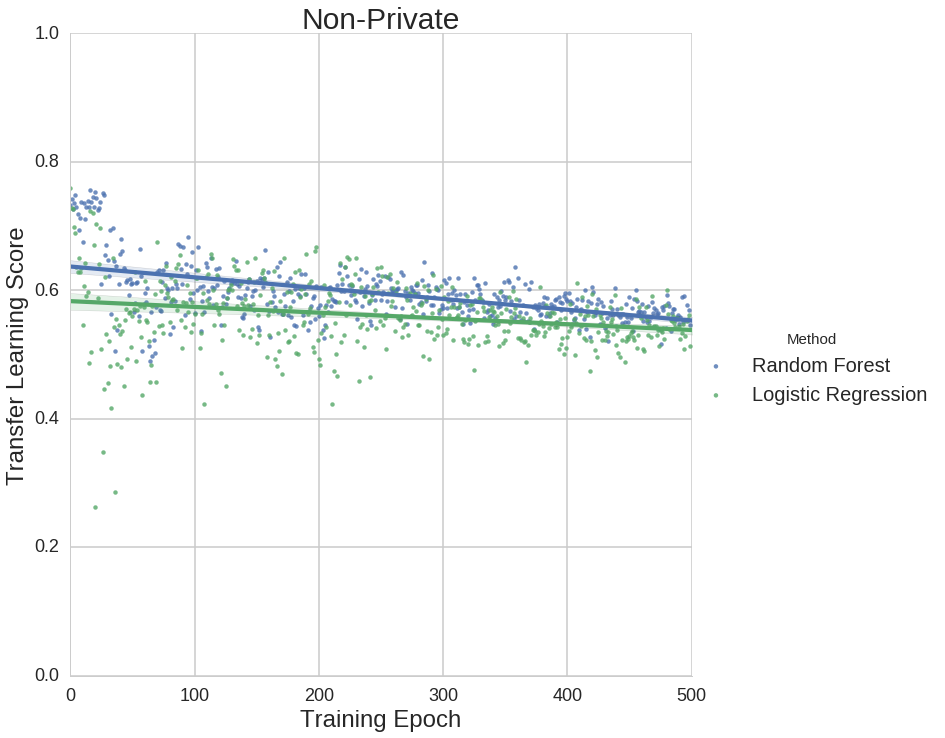

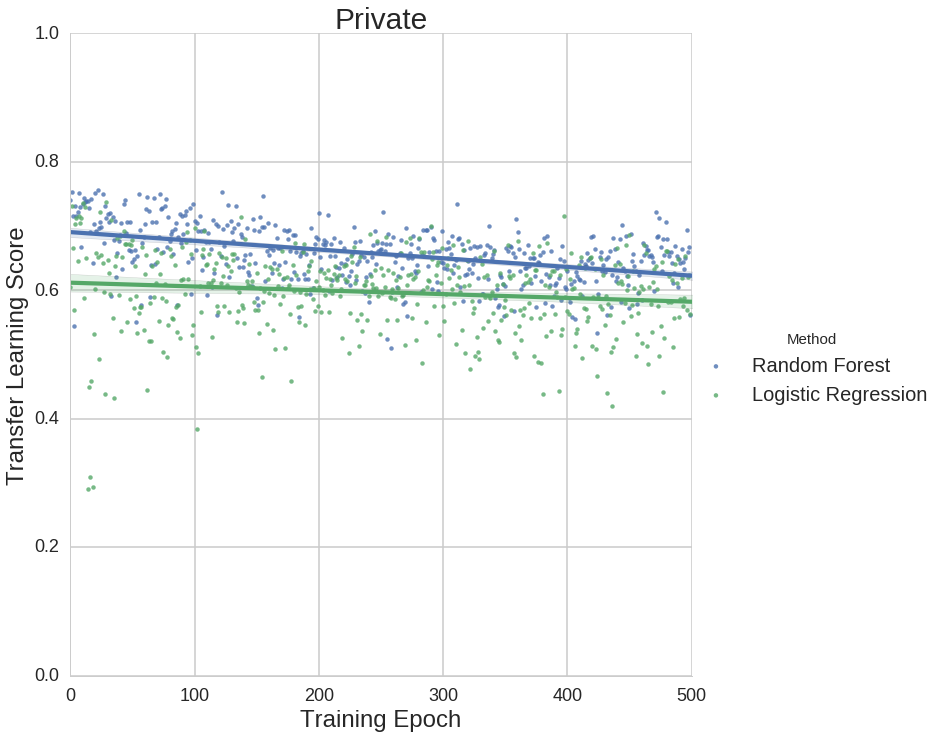

In [6]:
# plot public based on score instead of rank
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
public = np.concatenate([public_scores['rf'], public_scores['lr']])
index = np.concatenate([range(500), range(500)])
method = np.concatenate([['Random Forest'] * 500, ['Logistic Regression'] * 500])

arg_scores = {'score':public, 'index':index, 'Method':method}
arg_scores_df = pd.DataFrame.from_dict(arg_scores)

plt.figure(figsize=(6,4))
g = sns.lmplot(x="index", y="score", hue="Method", data=arg_scores_df, size=10,
               y_jitter=.02, logistic=False, legend=True, legend_out=True)
g.set(xlim=(0, 500), ylim=(0, 1))

plt.title('Non-Private', fontsize=30)
plt.xlabel('Training Epoch', fontsize=24)
plt.ylabel('Transfer Learning Score', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
g.savefig('./figures/Supplemental_Figure_3A.png', bbox_inches='tight')

# plot private based on score instead of rank
private = np.concatenate([epoch_scores['rf'], epoch_scores['lr']])
index = np.concatenate([range(500), range(500)])
method = np.concatenate([['Random Forest'] * 500, ['Logistic Regression'] * 500])

arg_scores = {'score':private, 'index':index, 'Method':method}
arg_scores_df = pd.DataFrame.from_dict(arg_scores)

plt.figure(figsize=(6,4))
g = sns.lmplot(x="index", y="score", hue="Method", data=arg_scores_df, size=10,
               y_jitter=.02, logistic=False, legend=True, legend_out=True)
g.set(xlim=(0, 500), ylim=(0, 1))

plt.title('Private', fontsize=30)
plt.xlabel('Training Epoch', fontsize=24)
plt.ylabel('Transfer Learning Score', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=18)
g.savefig('./figures/Supplemental_Figure_3B.png', bbox_inches='tight')

### Generate Samples for visualization and machine learning

In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from keras.models import load_model

acgan = __import__('mimic_ac_gan')

generate_count = 1000
latent_size = 100

X_private = []
y_private = []

X_public = []
y_public = []

for i in range(len(top_10)):
    print(i)
    private_gen = load_model(private_dir + '/params_generator_epoch_' + "{0:0=3d}".format(top_10[i]) + '.h5')
    public_gen = load_model(public_dir + '/params_generator_epoch_' + "{0:0=3d}".format(top_10_public[i]) + '.h5')
    
    noise = np.random.uniform(-1, 1, (generate_count, latent_size))
    sampled_labels = np.random.randint(0, 2, generate_count)
    
    X_public.extend(public_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0))
    y_public.extend(sampled_labels)

    X_private.extend(private_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0))
    y_private.extend(sampled_labels)

X_private = np.array(X_private)
y_private = np.array(y_private)

X_public = np.array(X_public)
y_public = np.array(y_public)
print(X_private.shape, y_private.shape, X_public.shape, y_public.shape)

X_public = X_public.reshape(X_public.shape[0], X_public.shape[2], X_public.shape[3]).clip(min=0).astype('int')
X_private = X_private.reshape(X_private.shape[0], X_private.shape[2], X_private.shape[3]).clip(min=0).astype('int')
print(X_private.shape)

0
1
2
3
4
5
6
7
8
9
((10000, 1, 9, 5), (10000,), (10000, 1, 9, 5), (10000,))
(10000, 9, 5)


Using TensorFlow backend.


In [8]:
epochs = 500 - 1

last_priv_gen = load_model(private_dir + '/params_generator_epoch_' + str(epochs) + '.h5')
last_public_gen = load_model(public_dir + '/params_generator_epoch_' + str(epochs) + '.h5')
noise = np.random.uniform(-1, 1, (generate_count, latent_size))
sampled_labels = np.random.randint(0, 2, generate_count)

last_X_private = last_priv_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)
last_X_public = last_public_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)

last_y_private = sampled_labels
last_y_public = sampled_labels

last_X_public = last_X_public.reshape(last_X_public.shape[0],
                                      last_X_public.shape[2],
                                      last_X_public.shape[3]).clip(min=0).astype('int')
last_X_private = last_X_private.reshape(last_X_private.shape[0],
                                        last_X_private.shape[2], 
                                        last_X_private.shape[3]).clip(min=0).astype('int')

In [9]:
real_split = 7500
X_train = X_real[:real_split]
X_test = X_real[real_split:]

y_train = y_real[:real_split]
y_test = y_real[real_split:]

## Figure 2

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn import neighbors

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

scores = {'real_rf':[], 'public_rf':[], 'private_rf':[],
          'real_linear':[], 'public_linear':[], 'private_linear':[], 
          'real_svm': [], 'public_svm': [], 'private_svm': [],
          'real_nn': [], 'public_nn': [], 'private_nn': []}
full_scores = {}

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_real = X_real.reshape(X_real.shape[0], -1)
X_public = X_public.reshape(X_public.shape[0], -1)
X_private = X_private.reshape(X_private.shape[0], -1)

print(X_train.shape, X_test.shape, X_real.shape, X_public.shape, X_private.shape)
print(y_train.shape, y_test.shape)

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
nn_clf = neighbors.KNeighborsClassifier(n_jobs=-1)
svm_clf = LinearSVC(C=1.0, random_state=0)
lr_clf = linear_model.LogisticRegression(random_state=0, n_jobs=-1)

full_real_rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
full_real_nn_clf = neighbors.KNeighborsClassifier(n_jobs=-1)
full_real_svm_clf = LinearSVC(C=1.0, random_state=0)
full_real_lr_clf = linear_model.LogisticRegression(random_state=0, n_jobs=-1)

full_public_rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
full_public_nn_clf = neighbors.KNeighborsClassifier(n_jobs=-1)
full_public_svm_clf = LinearSVC(C=1.0, random_state=0)
full_public_lr_clf = linear_model.LogisticRegression(random_state=0, n_jobs=-1)

full_private_rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
full_private_nn_clf = neighbors.KNeighborsClassifier(n_jobs=-1)
full_private_svm_clf = LinearSVC(C=1.0, random_state=0)
full_private_lr_clf = linear_model.LogisticRegression(random_state=0, n_jobs=-1)

((7500, 45), (760, 45), (8260, 45), (10000, 45), (10000, 45))
((7500,), (760,))


In [11]:
print('Real Random Forest')
real_y_pred = full_real_rf_clf.fit(X_train, y_train).predict_proba(X_test)
full_scores['real_rf'] = (roc_auc_score(y_test, real_y_pred[:, 1]))

print('Public Random Forest')
public_y_pred = full_public_rf_clf.fit(X_public, y_public).predict_proba(X_test)
full_scores['public_rf'] = (roc_auc_score(y_test, public_y_pred[:, 1]))

print('Private Random Forest')
private_y_pred = full_private_rf_clf.fit(X_private, y_private).predict_proba(X_test)
full_scores['private_rf'] = (roc_auc_score(y_test, private_y_pred[:, 1]))

# Nearest Neighbors
print('Real Nearest Neighbors')
real_y_pred = full_real_nn_clf.fit(X_train, y_train).predict_proba(X_test)
full_scores['real_nn'] = (roc_auc_score(y_test, real_y_pred[:, 1]))

print('Public Nearest Neighbors')
public_y_pred = full_private_nn_clf.fit(X_public, y_public).predict_proba(X_test)
full_scores['public_nn'] = (roc_auc_score(y_test, public_y_pred[:, 1]))

print('Private Nearest Neighbors')
private_y_pred = full_private_nn_clf.fit(X_private, y_private).predict_proba(X_test)
full_scores['private_nn'] = (roc_auc_score(y_test, private_y_pred[:, 1]))

# SVM
print('Real SVM')
real_y_pred = full_real_svm_clf.fit(X_train, y_train).decision_function(X_test)
full_scores['real_svm'] = (roc_auc_score(y_test, real_y_pred))

print('Public SVM')
public_y_pred = full_public_svm_clf.fit(X_public, y_public).decision_function(X_test)
full_scores['public_svm'] = (roc_auc_score(y_test, public_y_pred))

print('Private SVM')
private_y_pred = full_private_svm_clf.fit(X_private, y_private).decision_function(X_test)
full_scores['private_svm'] = (roc_auc_score(y_test, private_y_pred))

# Logistic Regression
print('Real Logistic Regression')
real_y_pred = full_real_lr_clf.fit(X_train, y_train).predict_proba(X_test)
full_scores['real_linear'] = (roc_auc_score(y_test, real_y_pred[:, 1]))

print('Public Logistic Regression')
public_y_pred = full_public_lr_clf.fit(X_public, y_public).predict_proba(X_test)
full_scores['public_linear'] = (roc_auc_score(y_test, public_y_pred[:, 1]))

print('Private Logistic Regression')
private_y_pred = full_private_lr_clf.fit(X_private, y_private).predict_proba(X_test)
full_scores['private_linear'] = (roc_auc_score(y_test, private_y_pred[:, 1]))

print(full_scores)

Real Random Forest
Public Random Forest
Private Random Forest
Real Nearest Neighbors
Public Nearest Neighbors
Private Nearest Neighbors
Real SVM
Public SVM
Private SVM
Real Logistic Regression
Public Logistic Regression
Private Logistic Regression
{'real_rf': 0.58054835091654688, 'private_nn': 0.56316813290806489, 'public_linear': 0.56676947881251971, 'public_rf': 0.53815586554975292, 'public_nn': 0.51609214538572068, 'real_nn': 0.5700772843573656, 'public_svm': 0.5382829203322701, 'private_linear': 0.59280256563036693, 'private_rf': 0.61470418141670469, 'real_svm': 0.59684203147453641, 'private_svm': 0.5881409694718025, 'real_linear': 0.59276751603518973}


In [12]:
pkl.dump(full_scores, open('/data/SPRINT/MIMIC/mimic_full_scores.p', 'wb'))

In [13]:
# shuffle generated examples
indices = range(X_private.shape[0])
np.random.shuffle(indices)

for i in range(10):
    print(i)
    start = i * generate_count
    stop = (i+1) * generate_count
    
    # real don't rely on indices because only 1 training set / 1 holdout
    # variability is from random state
    real_y_pred = rf_clf.fit(X_train, y_train).predict_proba(X_test)
    scores['real_rf'].append(roc_auc_score(y_test, real_y_pred[:, 1]))

    public_y_pred = rf_clf.fit(X_public[indices[start:stop]],
                               y_public[indices[start:stop]]).predict_proba(X_test)
    scores['public_rf'].append(roc_auc_score(y_test, public_y_pred[:, 1]))
    
    private_y_pred = rf_clf.fit(X_private[indices[start:stop]],
                                y_private[indices[start:stop]]).predict_proba(X_test)
    scores['private_rf'].append(roc_auc_score(y_test, private_y_pred[:, 1]))

    # Nearest Neighbors
    real_y_pred = nn_clf.fit(X_train, y_train).predict_proba(X_test)
    scores['real_nn'].append(roc_auc_score(y_test, real_y_pred[:, 1]))
    
    public_y_pred = nn_clf.fit(X_public[indices[start:stop]],
                               y_public[indices[start:stop]]).predict_proba(X_test)
    scores['public_nn'].append(roc_auc_score(y_test, public_y_pred[:, 1]))

    private_y_pred = nn_clf.fit(X_private[indices[start:stop]],
                                y_private[indices[start:stop]]).predict_proba(X_test)
    scores['private_nn'].append(roc_auc_score(y_test, private_y_pred[:, 1]))

    # SVM
    real_y_pred = svm_clf.fit(X_train, y_train).decision_function(X_test)
    scores['real_svm'].append(roc_auc_score(y_test, real_y_pred))
    
    public_y_pred = svm_clf.fit(X_public[indices[start:stop]],
                                y_public[indices[start:stop]]).decision_function(X_test)
    scores['public_svm'].append(roc_auc_score(y_test, public_y_pred))

    private_y_pred = svm_clf.fit(X_private[indices[start:stop]],
                                 y_private[indices[start:stop]]).decision_function(X_test)
    scores['private_svm'].append(roc_auc_score(y_test, private_y_pred))

    # Logistic Regression
    real_y_pred = lr_clf.fit(X_train, y_train).predict_proba(X_test)
    scores['real_linear'].append(roc_auc_score(y_test, real_y_pred[:, 1]))
    
    public_y_pred = lr_clf.fit(X_public[indices[start:stop]],
                               y_public[indices[start:stop]]).predict_proba(X_test)
    scores['public_linear'].append(roc_auc_score(y_test, public_y_pred[:, 1]))

    private_y_pred = lr_clf.fit(X_private[indices[start:stop]],
                                y_private[indices[start:stop]]).predict_proba(X_test)
    scores['private_linear'].append(roc_auc_score(y_test, private_y_pred[:, 1]))
        
print(scores)

0
1
2
3
4
5
6
7
8
9
{'real_rf': [0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688, 0.58054835091654688], 'private_nn': [0.57312221793838281, 0.56604658091199056, 0.56099067680768289, 0.57193929410115318, 0.56280011215870462, 0.56356244085380824, 0.57362605586905469, 0.57461182573341285, 0.56418895236760014, 0.55955364340541869], 'public_linear': [0.56056570046615961, 0.56700168238056847, 0.55898846868318675, 0.55590410430759518, 0.55823052118748029, 0.56041673968665662, 0.57880901475587965, 0.55889208229644949, 0.56154270793172345, 0.55492271564263429], 'public_rf': [0.52265956328204399, 0.53451070765132669, 0.53664435175773728, 0.55508482002032877, 0.54939802320283215, 0.52087203392800818, 0.53225438996179608, 0.5253627633100838, 0.51093985489467597, 0.5455250429357541], 'public_nn': [0.551216220952648, 0.50982264904840358, 0.51878658301496616, 0.5

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 40,
          'axes.titlesize':'x-large',
          'xtick.labelsize':15,
          'ytick.labelsize':15,
          'legend.edgecolor': 'black'}
pylab.rcParams.update(params)

transfer_scores = pd.DataFrame.from_dict(scores, orient='index')
print(transfer_scores)

full_scores_df = pd.DataFrame.from_dict(data=full_scores, orient='index')
full_scores_df.columns = ['Score']

                       0         1         2         3         4         5  \
real_rf         0.580548  0.580548  0.580548  0.580548  0.580548  0.580548   
private_nn      0.573122  0.566047  0.560991  0.571939  0.562800  0.563562   
public_linear   0.560566  0.567002  0.558988  0.555904  0.558231  0.560417   
public_rf       0.522660  0.534511  0.536644  0.555085  0.549398  0.520872   
public_nn       0.551216  0.509823  0.518787  0.518046  0.506826  0.505958   
private_linear  0.580001  0.600277  0.575164  0.583874  0.587703  0.584075   
private_rf      0.603374  0.597473  0.616001  0.583041  0.601355  0.595331   
real_svm        0.596842  0.596842  0.596842  0.596842  0.596842  0.596842   
private_svm     0.577617  0.597710  0.582375  0.587282  0.584873  0.581078   
real_nn         0.570077  0.570077  0.570077  0.570077  0.570077  0.570077   
public_svm      0.526857  0.538344  0.537442  0.529862  0.529591  0.502892   
real_linear     0.592768  0.592768  0.592768  0.592768  0.592768

## Figure 3

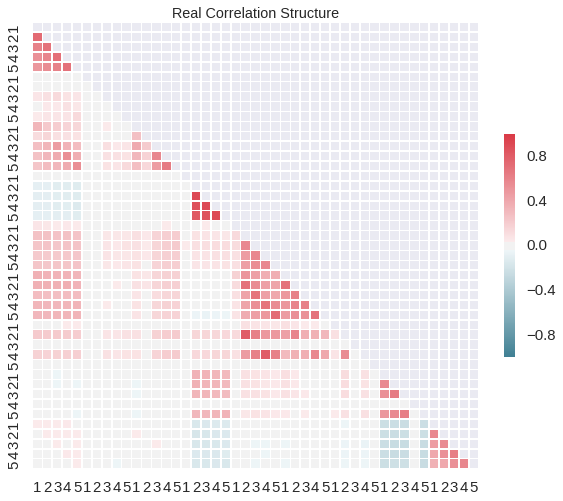

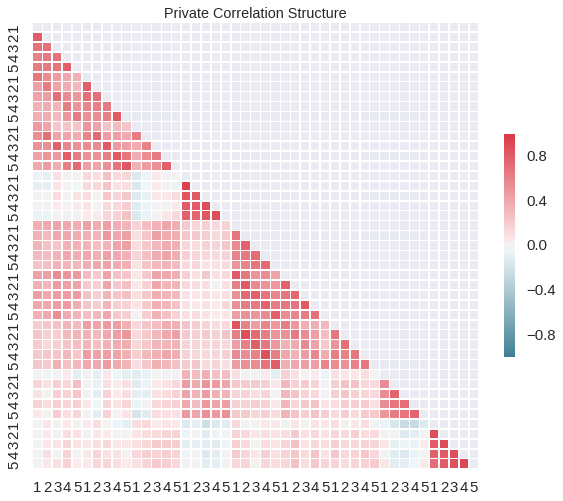

In [15]:
from matplotlib import gridspec

sns.set_style('darkgrid')

visit_codes = ['1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5',
               '1', '2', '3', '4', '5']

d = pd.DataFrame(X_train)
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

fig = plt.figure(figsize=(9, 8))
ax0 = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=visit_codes, yticklabels=visit_codes,
            linewidths=.5, cbar=1, cbar_kws={"fraction": 0.05,
                                             "shrink": 0.5,
                                             "orientation": "vertical"})
ax0.set_title("Real Correlation Structure")
plt.show()
fig.savefig('./figures/Figure_3A.png', bbox_inches='tight')

fig = plt.figure(figsize=(9, 8))
d = pd.DataFrame(X_private)
private_corr = d.corr()
mask = np.zeros_like(private_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax2 = sns.heatmap(private_corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=visit_codes, yticklabels=visit_codes,
            linewidths=.5, cbar=1, cbar_kws={"fraction": 0.05,
                                             "shrink": 0.5,
                                             "orientation": "vertical"})
ax2.set_title("Private Correlation Structure")
sns.set_style('whitegrid')
plt.show()
fig.savefig('./figures/Figure_3C.png', bbox_inches='tight')

In [16]:
real_matrix = corr.as_matrix()
real_list = []

private_matrix = private_corr.as_matrix()
private_list = []

# only examine below the triangle
for i in range(36):
    for j in range(36):
        if j < i:
            real_list.append(real_matrix[i, j])
            private_list.append(private_matrix[i, j])

In [17]:
from scipy.stats import spearmanr
print('Real to private')
print(spearmanr(real_list, private_list))

Real to private
SpearmanrResult(correlation=0.55982933885422947, pvalue=2.9954485491603306e-53)


## Figure 4

0.580548350917


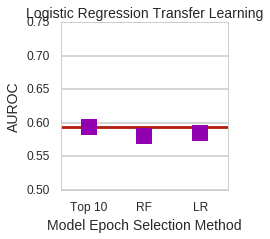

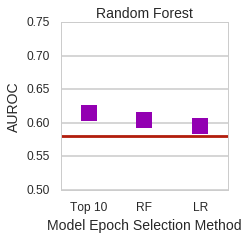

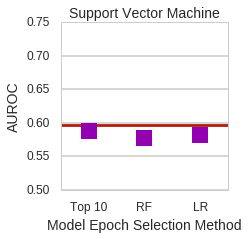

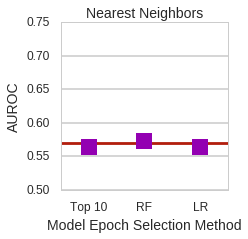

In [18]:
import matplotlib.lines as mlines

markers = ['o', '^', 's']
colors = ['#B21E0D', '#FF412B', '#0E5FCC', '#537CB2', '#9300B2', '#DA2BFF']


full_scores_df = pd.DataFrame.from_dict(data=full_scores, orient='index')
full_scores_df.columns = ['Score']
full_scores_df['models'] = ['combined'] * 12
# full_scores_df.loc[full_scores_df['real_rf'], 'method'] = 'Real'
full_scores_df.loc[['real_rf', 'real_nn', 'real_svm', 'real_linear'], 'method'] = 'Real'
full_scores_df.loc[['public_rf', 'real_nn', 'real_svm', 'real_linear'], 'privacy'] = 'Real'

score_df_rf = transfer_scores[0]
#score_df_rf['real_rf']['method'] = 'Real'
score_df_rf = pd.DataFrame(score_df_rf)
score_df_rf.columns = ['Score']
score_df_rf['models'] = ['top_rf'] * 12
score_df_rf.drop(['real_rf', 'real_nn', 'real_svm', 'real_linear'], inplace=True)

score_df_lr = transfer_scores[5]
score_df_lr = pd.DataFrame(score_df_lr)
score_df_lr.columns = ['Score']
score_df_lr['models'] = ['top_lr'] * 12
score_df_lr.drop(['real_rf', 'real_nn', 'real_svm', 'real_linear'], inplace=True)
full_scores_df = full_scores_df.append(score_df_rf).append(score_df_lr)

full_scores_df['privacy'] = [d.split('_')[0] for d in full_scores_df.index]
full_scores_df = pd.concat([full_scores_df, pd.get_dummies(full_scores_df['privacy'])], axis=1)
full_scores_df['meth_group'] = [d.split('_')[1] for d in full_scores_df.index] #.split('_')
full_scores_df = pd.concat([full_scores_df, pd.get_dummies(full_scores_df['meth_group'])], axis=1)

real_rf_score = full_scores_df.loc['real_rf']['Score']
real_lr_score = full_scores_df.loc['real_linear']['Score']
real_svm_score = full_scores_df.loc['real_svm']['Score']
real_nn_score = full_scores_df.loc['real_nn']['Score']
print(real_rf_score)


fig = plt.figure(figsize=(3, 3))
df = full_scores_df
private_lr = df.loc[(df['meth_group'] == 'linear') & (df['private'] == 1.0)]

n = sns.stripplot(data=private_lr, y="Score", x="models",
                  hue="privacy", size=16, marker=markers[2], split=True,
                  palette=[colors[4]])

real_patch = mlines.Line2D([], [], color=colors[0],
              label='Real (Benchmark)')
private_patch = mlines.Line2D([], [], marker=markers[2], 
                              markersize=14, linewidth=0, color=colors[4])

methods = ["Top 10", "RF", "LR"]
n.set_xticklabels(methods)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Logistic Regression Transfer Learning', fontsize=14)
plt.ylim([0.5, 0.75])
n.legend_.remove()
plt.xlabel('Model Epoch Selection Method', fontsize=14)
plt.ylabel('AUROC', fontsize=14)

# plt.legend(handles=[real_patch, public_patch, private_patch],
#            labels=['Real (Benchmark)', 'Non-Private', 'Private'],
#            loc='right', ncol=1,
#            bbox_to_anchor=(1.4, 0.5), fancybox=True)
plt.plot(np.linspace(-20,120,1000), [real_lr_score]*1000, colors[0])
fig.savefig('./figures/Figure_4A.png', bbox_inches='tight')


fig = plt.figure(figsize=(3, 3))
private_rf = df.loc[(df['meth_group'] == 'rf') & (df['private'] == 1.0)]

n = sns.stripplot(data=private_rf, y="Score", x="models",
                  hue="privacy", size=16, marker=markers[2], split=True,
                  palette=[colors[4]])
n.set_xticklabels(methods)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Random Forest', fontsize=14)
plt.ylim([0.5, 0.75])
plt.xlabel('Model Epoch Selection Method', fontsize=14)
plt.ylabel('AUROC', fontsize=14)
n.legend_.remove()
plt.plot(np.linspace(-20,120,1000), [real_rf_score]*1000, colors[0])
fig.savefig('./figures/Figure_4B.png', bbox_inches='tight')

fig = plt.figure(figsize=(3,3))
private_svm = df.loc[(df['meth_group'] == 'svm') & (df['private'] == 1.0)]

n = sns.stripplot(data=private_svm, y="Score", x="models",
                  hue="privacy", size=16, marker=markers[2], split=True,
                  palette=[colors[4]])


n.set_xticklabels(methods)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Support Vector Machine', fontsize=14)
plt.ylim([0.5, 0.75])
plt.xlabel('Model Epoch Selection Method', fontsize=14)
plt.ylabel('AUROC', fontsize=14)
n.legend_.remove()
plt.plot(np.linspace(-20,120,1000), [real_svm_score]*1000, colors[0])
fig.savefig('./figures/Figure_4C.png', bbox_inches='tight')

fig = plt.figure(figsize=(3, 3))
private_nn = df.loc[(df['meth_group'] == 'nn') & (df['private'] == 1.0)]

n = sns.stripplot(data=private_nn, y="Score", x="models",
                  hue="privacy", size=16, marker=markers[2], split=True,
                  palette=[colors[4]])

n.set_xticklabels(methods)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Nearest Neighbors', fontsize=14)
plt.ylim([0.5, 0.75])
plt.xlabel('Model Epoch Selection Method', fontsize=14)
plt.ylabel('AUROC', fontsize=14)
n.legend_.remove()
plt.plot(np.linspace(-20,120,1000), [real_nn_score]*1000, colors[0])
fig.savefig('./figures/Figure_4D.png', bbox_inches='tight')

In [19]:
real_rf_importances = full_real_rf_clf.feature_importances_
private_rf_importances = full_private_rf_clf.feature_importances_

real_lr_coefs = full_real_lr_clf.coef_[0]
private_lr_coefs = full_private_lr_clf.coef_[0]

real_svm_coefs = full_real_svm_clf.coef_[0]
private_svm_coefs = full_private_svm_clf.coef_[0]

In [20]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

print('RF')
print(spearmanr(real_rf_importances, private_rf_importances))

print('SVM')
print(spearmanr(real_svm_coefs, private_svm_coefs))

print('LR')
print(spearmanr(real_lr_coefs, private_lr_coefs))

RF
SpearmanrResult(correlation=0.4059288537549407, pvalue=0.0056635770876225268)
SVM
SpearmanrResult(correlation=0.29525691699604739, pvalue=0.048947206483028687)
LR
SpearmanrResult(correlation=0.4268774703557312, pvalue=0.0034516453249828212)
